# Lecture 4


## Exercise 1

In [65]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import norm

In [4]:
def sim_data(n):
    """
    generates the dat with the latent variable
    """

    ei = norm.rvs( loc=0, scale=1, size=n )
    zi = np.random.choice( range(1,6), size=n, replace=True )
    xi = np.random.uniform( zi, zi+3, size=n )
    ui = norm.rvs( loc=2*zi, scale=0.1, size=n )
    yi = ui - xi + ei
    
    return pd.DataFrame( {'xi': xi, 'yi': yi, 'zi': zi} )



In [7]:
# generating the data

np.random.seed( 64567890 )
df = sim_data( 100 )
df

,xi,yi,zi
0,3.159905,-1.769639,1
1,6.410540,2.248691,4
2,6.525877,1.926530,4
3,5.722139,-1.451325,3
4,4.019780,2.249308,4
...,...,...,...
95,7.833162,2.303349,5
96,1.663403,0.095668,1
97,4.076769,0.048038,2
98,5.845608,4.393138,5


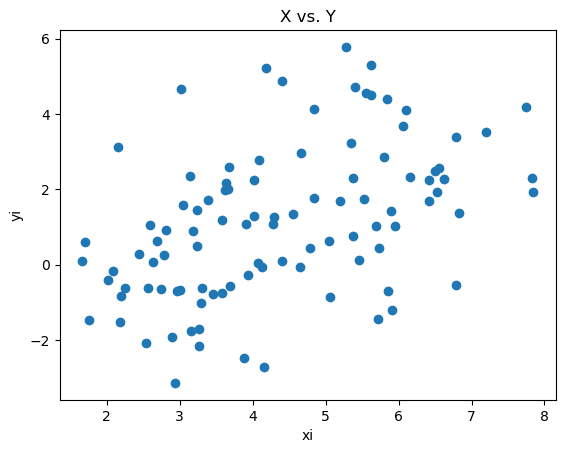

In [10]:
# visualizing the data

plt.scatter( df.xi, df.yi )
plt.title( 'X vs. Y' )
plt.xlabel( 'xi' )
plt.ylabel( 'yi' )
plt.show()

### Lattent correlation between X, Z, and Y
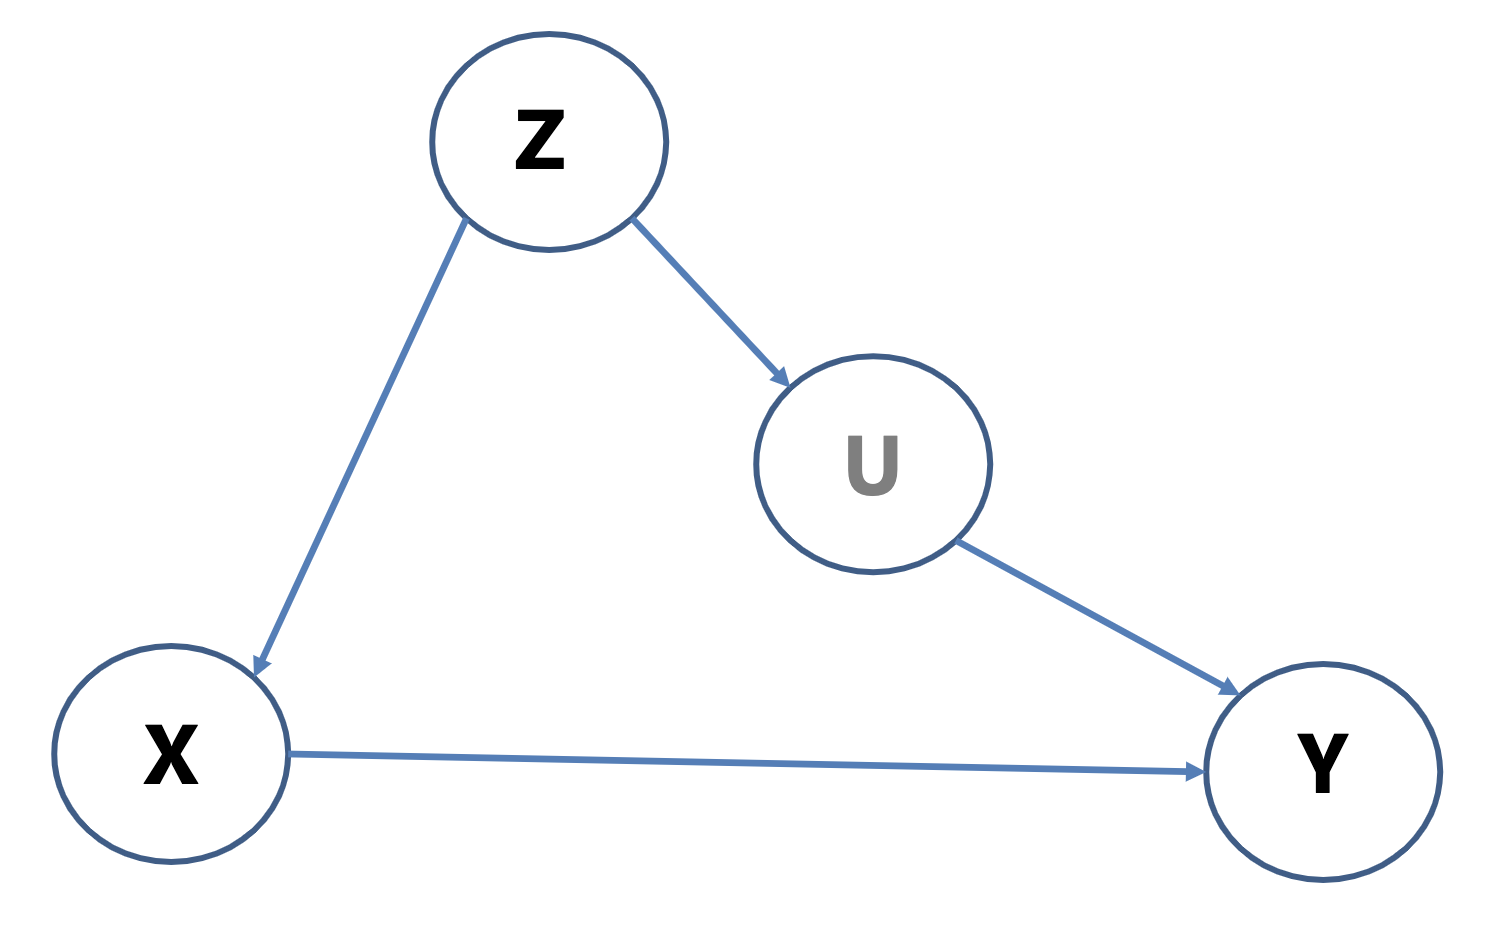

In [11]:
#define response variable

y = df[ 'yi' ]
x = df[[ 'xi' ]]
x = sm.add_constant( x )

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yi   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.55
Date:                Mon, 15 May 2023   Prob (F-statistic):           8.89e-07
Time:                        09:55:29   Log-Likelihood:                -198.43
No. Observations:                 100   AIC:                             400.9
Df Residuals:                      98   BIC:                             406.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5127      0.534     -2.835      0.006      -2.572      -0.454
xi             0.6033      0.115      5.248      0.000       0.375       0.831
==============================================================================
Omnibus:                        1.430   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.274
Skew:                           0.275   Prob(JB):                        0.529
Kurtosis:                       2.948   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


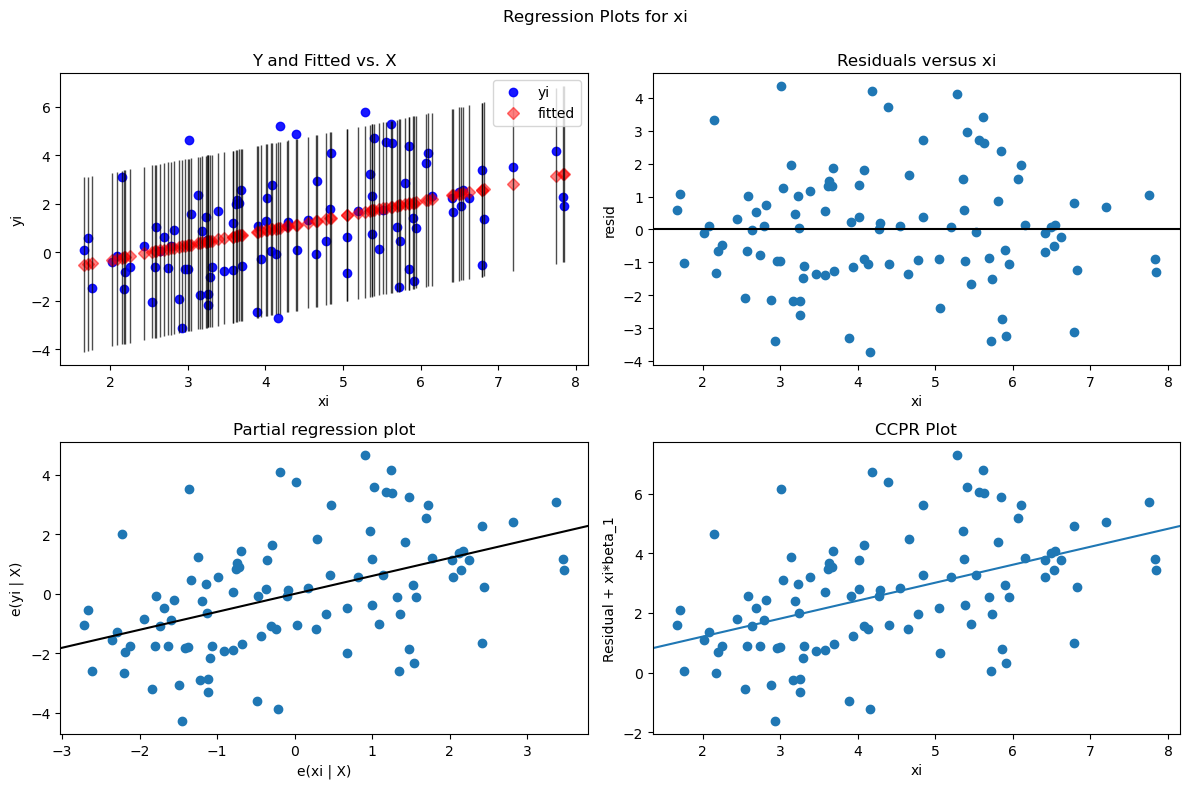

In [13]:
# vizualizing the model

fig = plt.figure( figsize=(12,8) )
fig = sm.graphics.plot_regress_exog( model, 'xi', fig=fig )

## Exercise 2

Fit a linear mixed model with random intercept to the data you simulated in Exercise 01,
report the fixed-effect estimate of β1.
Tip: you can use statsmodels package in python

```python
import statsmodels.api as sm
import statsmodels.formula.api as smf

lmm = smf.mixedlm("yi ~ xi", data, groups=data["zi"],
re_formula="~1") lmmFit = lmm.fit()
print(lmmFit.summary())
```

In [17]:
lmm = smf.mixedlm( "yi ~ xi", data=df, groups=df["zi"], re_formula="~1") 
lmmFit = lmm.fit()
lmmFit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: yi       
No. Observations: 100     Method:             REML     
No. Groups:       5       Scale:              1.1015   
Min. group size:  16      Log-Likelihood:     -158.5245
Max. group size:  23      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     5.230    1.520  3.442 0.001  2.252  8.209
xi           -0.885    0.132 -6.681 0.000 -1.144 -0.625
Group Var     9.732    6.847                           
=======================================================

"""

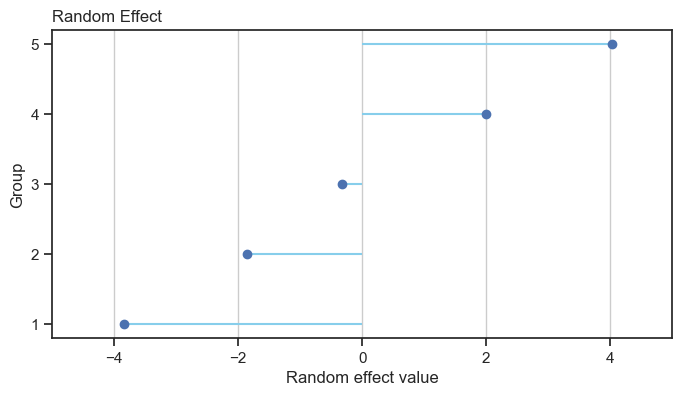

In [75]:
fig = plt.figure( figsize=(8,4) )
# sns.set( style="ticks" )

temp_df = pd.DataFrame( lmmFit.random_effects ).T
my_range = range( 1, temp_df.shape[ 0 ] + 1 )
 
# The horizontal plot is made using the hline function

plt.hlines( y=temp_df.index, xmin=0, xmax=temp_df.Group, color='skyblue' )
plt.yticks( my_range, temp_df.index )
plt.plot( temp_df.Group, temp_df.index, "o" )

plt.title( "Random Effect", loc='left' )
plt.xlabel( 'Random effect value' )
plt.ylabel( 'Group' )
plt.xlim( -5, 5 )
plt.gca().xaxis.grid( True )
plt.show()

del temp_df, ax